# 13.3. Simulating a Brownian motion

The code below is adapted from  one of the 100+ free recipes of the IPython Cookbook, Second Edition, by Cyrille Rossant, a guide to numerical computing and data science in the Jupyter Notebook. The ebook and printed book are available for purchase at Packt Publishing.
Available at: https://github.com/ipython-books/cookbook-2nd/blob/master/chapter13_stochastic/03_brownian.md 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
n = 1000 #number of iterations

In [ ]:
xi=(np.random.randn(n))#generate array of random integers size n for the movement in the x direction
yi=(np.random.randn(n))#generate array of random integers size n for the movement in the y direction
zi=(np.random.randn(n))#generate array of random integers size n for the movement in the z direction


x=np.cumsum(xi)#cumulative sum of all of the elements in the x direction
y=np.cumsum(yi)#cumulative sum of all of the elements in the y direction
z=np.cumsum(zi)#cumulative sum of all of the elements in the z direction

D=(x[-1]**2+y[-1]**2+z[-1]**2)**(0.5) #having the cumulative sums in the distance formula, finding the total distance
print(D/n**(0.5)) #using formula that we talked about from class

0.9086983532020037


In [ ]:
N=np.linspace(1000,10000,30) #Return evenly spaced numbers over an interval 1000-10000, with the num=30
D_N=[]#create array
for n in N:#for loop
    n=int(n)
    d_s=[]#create array
    for s in range(1000):#for loop range 1000
        
    
        xi=(np.random.randn(n))#generate array of random integers size n for the movement in the x direction
        yi=(np.random.randn(n))#generate array of random integers size n for the movement in the y direction
        zi=(np.random.randn(n))#generate array of random integers size n for the movement in the z direction


        x=np.cumsum(xi)#cumulative sum of all of the elements in the x direction
        y=np.cumsum(yi)#cumulative sum of all of the elements in the y direction
        z=np.cumsum(zi)#cumulative sum of all of the elements in the z direction

        D=(x[-1]**2+y[-1]**2+z[-1]**2)**(0.5)#having the cumulative sums in the distance formula, finding the total distance
        
        d_s.append(D)#appending onto the second array you created
    DM=np.mean(d_s)#finding the mean of the value in the second for loop and setting that value equal to DM
    D_N.append(DM)#appending DM to the first for loop we created


  
#print(D/n**(0.5))

In [ ]:
exp=np.linspace(0,2,20) #Return evenly spaced numbers over an interval 0-2, with the num=20
M=[]#create array M
ST=[]#create array ST
for ex in exp: #for loop
    #print(ex)
    m=np.mean(D_N/N**(ex))#mean of values from linspace
    st=np.std(D_N/N**(ex))#standard deviation of values from linspace
    M.append(m)#append mean values into array m
    ST.append(st)#append standard deviation into array st

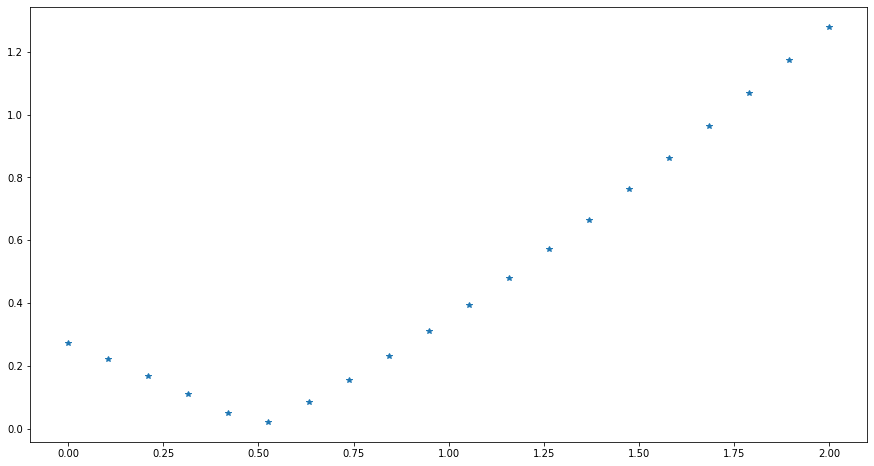

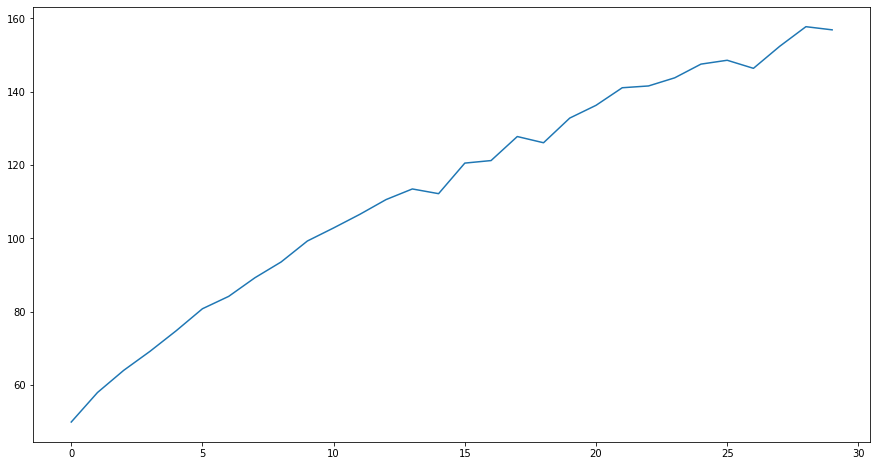

In [ ]:
ST=np.array(ST)#make ST an np.array
M=np.array(M)#make ST an an.array
#print(D_N)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))#create figure size 15,8
ax.plot(exp,ST/M, '*') #plot exp,ST/M
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 8))#create figure size 15,8
ax1.plot(D_N)#plot the array D_N

The top graph shows the accuracy of the exponential values from the fucntion DN^(exp). The vertex of the graph would lead to the best exponential value being 0.5

The bottom graph plots the values from the D_N array, which we calcualted using the nested for loop above. Graphing the mean of the value in the second for loop which is the mean of the total distance from x y and z directions.

In [ ]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x) #Returns the one-dimensional interpolant to a function with given data points (np.arange(n),x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y) #Returns the one-dimensional interpolant to a function with given data points (np.arange(n),y)
z2 = np.interp(np.arange(n * k), np.arange(n) * k, z) #Returns the one-dimensional interpolant to a function with given data points (np.arange(n),z)

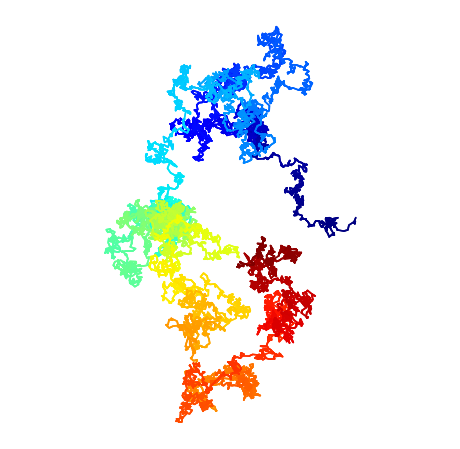

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) #create figure 8,8


# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0, #create scatter of 2d array of x2 and y2 values
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

Create a graph with the x values (x2) and y values (y2) being calculated in the cell above. Using the means of interpolants.

(-124.98459519817357,
 5.563518937010348,
 -106.27900633171517,
 99.55123963824812)

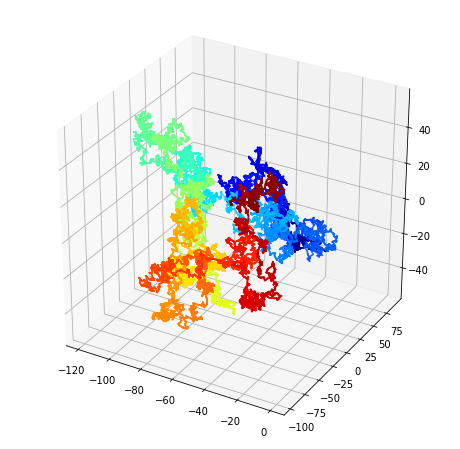

In [ ]:
#https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
fig = plt.figure(figsize=(8, 8))#create figure size 8,8
ax = fig.add_subplot(projection='3d') #make plot 3d

ax.scatter3D(x2,y2,z2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet) #create scatter with x2 y2 and z2 values

ax.axis('auto')
#ax.set_axis_off()

Create a graph with the x values (x2) and y values (y2) and z values (z2) being calculated in the cells above.

In [ ]:
Dalpha=np.random.uniform(low=0, high=2*np.pi,size=1) #Draw samples from (0,2)
alpha=[Dalpha]#creating list with a value of Dalpha
min_angle=np.pi/10#creating the minimum angle traveled
for i in range(n-1): #for loop range n-1
    Dalpha=np.random.uniform(low=Dalpha-(np.pi-min_angle), high=Dalpha+(np.pi-min_angle),size=1)#Draw samples from (dalpha-minangle,dalpha+minangle)
    alpha.append(Dalpha)#appending (Dalpha)

alpha=np.array(alpha)#making alpha into np.array


In [ ]:
alpha.shape#shaping alpha

(10000, 1)

In [ ]:
dist=abs(np.random.randn(n))#created array dist from absolute value of random ints
x=np.cumsum(np.cos(alpha.ravel())*dist)#cumulative sum of values cos(alpha*dist)
y=np.cumsum(np.sin(alpha.ravel())*dist)#cumulative sum of values sin(alpha*dist)
D=(x[-1]**2+y[-1]**2)**(0.5)#distance from distance formula
print(D/n**(0.5))

(np.sin(alpha.ravel())*dist).shape

0.4184484740767093


(10000,)

In [ ]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)#Returns the one-dimensional interpolant to a function with given data points (np.arange(n),x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)#Returns the one-dimensional interpolant to a function with given data points (np.arange(n),y)

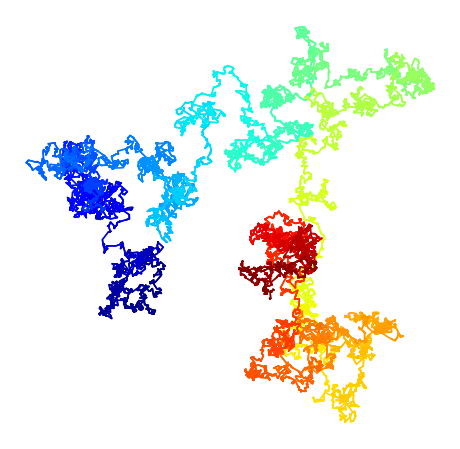

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))#create figure size 8,8
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)#create scatter 2d of x2 and y2 values
ax.axis('equal')
ax.set_axis_off()

The previous few code cells reduce the range of possible random angles at each step of the random walk. Check whether the exponent $\beta$ in the expression $\bar D(N) \approx N^{\beta}$ is affected by this modification (where $\bar D(N)$ is the average distance from the origin of a random walk of $N$ steps). 

In [ ]:
N=np.linspace(1000,10000,30) #Return evenly spaced numbers over an interval 1000-10000, with the num=30
D_R=[]#create array
for n in N:#for loop
    n=int(n)
    d_w=[]#create array
    for s in range(1000):#for loop range 1000
      dist=abs(np.random.randn(10000))#created array dist from absolute value of random ints
      x=np.cumsum(np.cos(alpha.ravel())*dist)#cumulative sum of values cos(alpha*dist)
      y=np.cumsum(np.sin(alpha.ravel())*dist)#cumulative sum of values sin(alpha*dist)
      D=(x[-1]**2+y[-1]**2)**(0.5)#distance from distance formula
      d_w.append(D)#appending onto the second array you created
    DR=np.mean(d_w)#finding the mean of the value in the second for loop and setting that value equal to DM
    D_R.append(DR)#appending DM to the first for loop we created

In [ ]:
lxp=np.linspace(0,2,200) #Return evenly spaced numbers over an interval 0-2, with the num=20
Q=[]#create array M
STT=[]#create array ST
for ex in lxp: #for loop
    #print(ex)
    wr=np.mean(D_R/N**(ex))#mean of values from linspace
    wt=np.std(D_R/N**(ex))#standard deviation of values from linspace
    Q.append(wr)#append mean values into array wr
    STT.append(wt)#append standard deviation into array wt

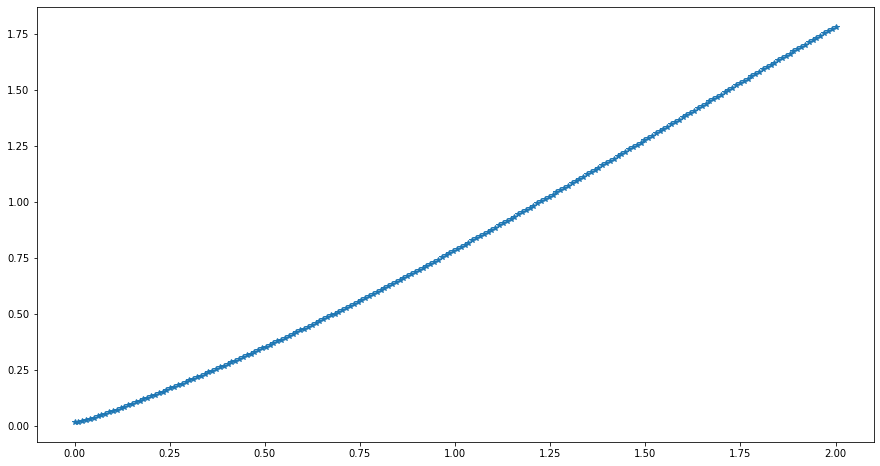

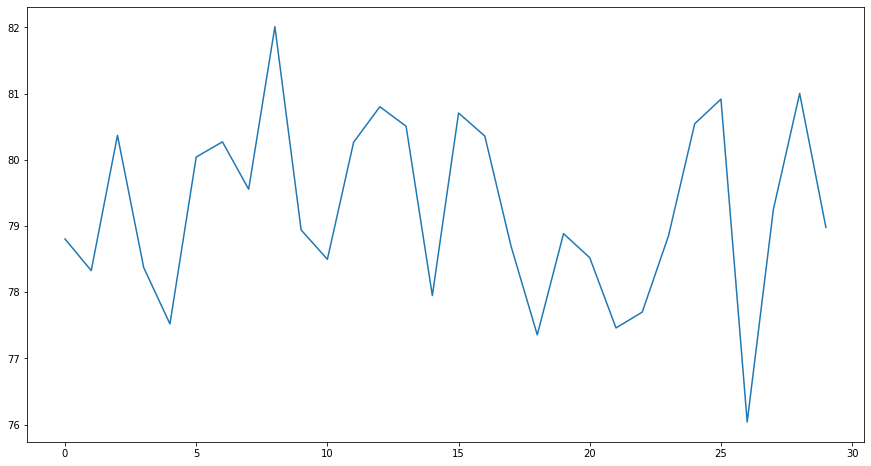

In [ ]:
STT=np.array(STT)#make ST an np.array
Q=np.array(Q)#make ST an an.array
#print(D_N)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))#create figure size 15,8
ax.plot(lxp,STT/Q, '*') #plot exp,STT/Q
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 8))#create figure size 15,8
ax1.plot(D_R)#plot the array D_R

The comulative sum seems a lot more extreme compared to the other one. The graph just keeps increasing, i even changed the interval of how many points and it keeps increasing. There may be a mistake in my code because of this result. If not the restricted range effected the beta a lot.

There are a lot of things that can apply random walks. For example quantam mechanics uses it for quantum walks. In mathematics you can use it for laplace equations, and to estimate harmonic measure. In computer science it's used to estimate the size of the web. 